<a href="https://colab.research.google.com/github/VedithVarma/ML_LAB_1BM22CS339/blob/main/1BM22CS339_LAB_10_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

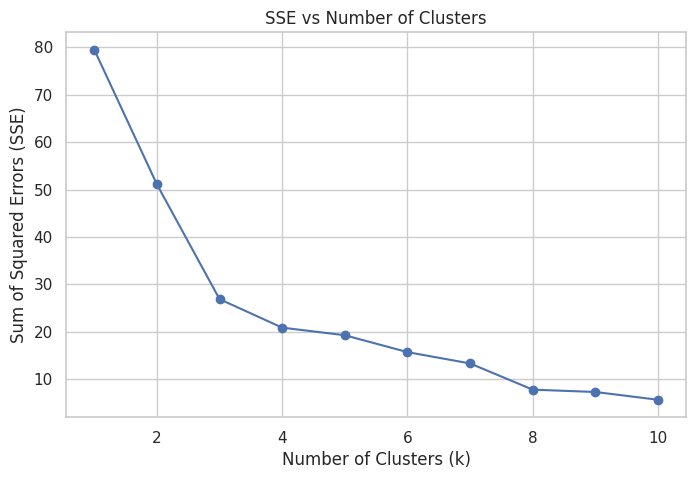

Cluster labels for test data: [2 1 1 1 2 0 2 2 1 0]


In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

# Step 1: Create synthetic income dataset
np.random.seed(42)
names = [f'Person_{i}' for i in range(1, 51)]
ages = np.random.randint(20, 60, size=50)
incomes = np.random.randint(20000, 120000, size=50)

income_df = pd.DataFrame({
    'Name': names,
    'Age': ages,
    'Income': incomes
})

# Save to CSV (optional)
income_df.to_csv("income.csv", index=False)

# Step 2: Load and preprocess
df = pd.read_csv("income.csv")

# Drop name (non-numeric)
df_numeric = df.drop('Name', axis=1)

# Step 3: Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 4: Train-test split
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Step 5: SSE vs number of clusters (Elbow method)
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train)
    sse.append(km.inertia_)

# Step 6: Plot SSE
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('SSE vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

# Step 7: Fit KMeans with optimal k (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)

# Step 8: Predict clusters on test set
y_pred = kmeans.predict(X_test)

# Step 9: "Accuracy" – not meaningful in unsupervised, but just a check
print("Cluster labels for test data:", y_pred)


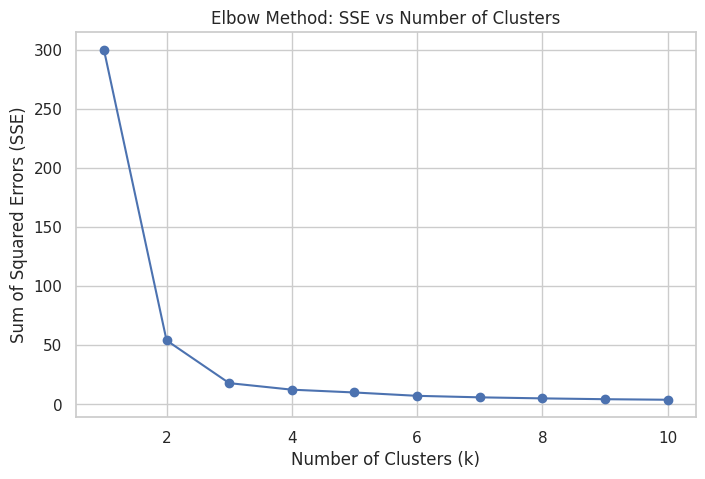

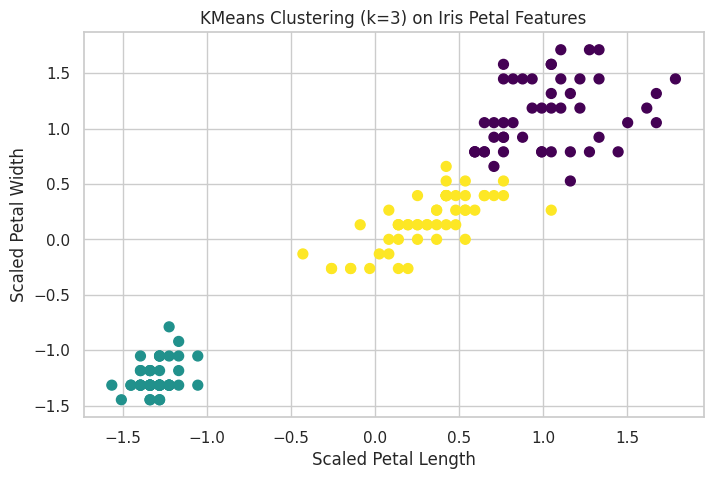

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Step 1: Load iris dataset and use only petal length & width
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df = iris_df[['petal length (cm)', 'petal width (cm)']]  # drop other features

# Step 2: Scaling
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Step 3: Elbow method to find optimal k
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(iris_scaled)
    sse.append(km.inertia_)

# Step 4: Plot SSE vs k
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method: SSE vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()

# Optional: Fit with optimal k = 3 and visualize clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(iris_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clustering (k=3) on Iris Petal Features")
plt.xlabel("Scaled Petal Length")
plt.ylabel("Scaled Petal Width")
plt.grid(True)
plt.show()
